In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import skew, kurtosis

In [2]:
C = pd.read_csv("Customers.csv")
P = pd.read_csv("Products.csv")
T = pd.read_csv("Transactions.csv")

### checking the data

###### missing values

In [3]:
print(C.isnull().sum())
print(P.isnull().sum())
print(T.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


###### data type check

In [4]:
print(C.dtypes)
print(P.dtypes)
print(T.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


### combining the data set

In [5]:
ct = T.merge(C, on = "CustomerID")
ct

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


### feature engineering 

###### recency  [active and inactive customers]

In [6]:
ct["TransactionDate"] = pd.to_datetime(ct["TransactionDate"])

# Find the latest transaction date in the dataset
latest_date = ct["TransactionDate"].max()

# Calculate Recency (difference between latest date and last transaction)
recency = ct.groupby("CustomerID")["TransactionDate"].max().reset_index()
recency["Recency"] = (latest_date - recency["TransactionDate"]).dt.days

In [7]:
recency.drop(columns=["TransactionDate"], inplace=True)

In [8]:
recency

,CustomerID,Recency
0,C0001,55
1,C0002,25
2,C0003,125
3,C0004,4
4,C0005,54
...,...,...
194,C0196,13
195,C0197,0
196,C0198,84
197,C0199,63


###### freuqency [loyal vs occasional customers]

In [9]:
frequency = ct.groupby("CustomerID")["TransactionID"].count().reset_index()
frequency.rename(columns = {"TransactionID" : "Frequency"}, inplace = True)
frequency

,CustomerID,Frequency
0,C0001,5
1,C0002,4
2,C0003,4
3,C0004,8
4,C0005,3
...,...,...
194,C0196,4
195,C0197,3
196,C0198,2
197,C0199,4


###### classification (high vs regular value)

In [10]:
monetary = ct.groupby("CustomerID")["TotalValue"].sum().reset_index()
monetary.rename(columns={"TotalValue": "MonetaryValue"}, inplace=True)
monetary

,CustomerID,MonetaryValue
0,C0001,3354.52
1,C0002,1862.74
2,C0003,2725.38
3,C0004,5354.88
4,C0005,2034.24
...,...,...
194,C0196,4982.88
195,C0197,1928.65
196,C0198,931.83
197,C0199,1979.28


######  signup recency [new vs long time customers]

In [11]:
ct

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [12]:
ct["SignupDate"] = pd.to_datetime(ct["SignupDate"])
signup = ct.groupby("CustomerID")["SignupDate"].min().reset_index()
signup["SignupRecency"] = (latest_date - signup["SignupDate"]).dt.days

In [13]:
signup.drop(columns = "SignupDate", inplace = True)

In [14]:
signup

,CustomerID,SignupRecency
0,C0001,902
1,C0002,1049
2,C0003,296
3,C0004,811
4,C0005,866
...,...,...
194,C0196,935
195,C0197,648
196,C0198,1035
197,C0199,756


###### Merge all features into one dataset

In [15]:
# Merge all features into one dataset
customer_features = recency.merge(frequency, on="CustomerID")
customer_features = customer_features.merge(monetary, on="CustomerID")
customer_features = customer_features.merge(signup, on="CustomerID")

customer_features

,CustomerID,Recency,Frequency,MonetaryValue,SignupRecency
0,C0001,55,5,3354.52,902
1,C0002,25,4,1862.74,1049
2,C0003,125,4,2725.38,296
3,C0004,4,8,5354.88,811
4,C0005,54,3,2034.24,866
...,...,...,...,...,...
194,C0196,13,4,4982.88,935
195,C0197,0,3,1928.65,648
196,C0198,84,2,931.83,1035
197,C0199,63,4,1979.28,756


### normalization

###### checking distribution of each

In [16]:
customer_features

,CustomerID,Recency,Frequency,MonetaryValue,SignupRecency
0,C0001,55,5,3354.52,902
1,C0002,25,4,1862.74,1049
2,C0003,125,4,2725.38,296
3,C0004,4,8,5354.88,811
4,C0005,54,3,2034.24,866
...,...,...,...,...,...
194,C0196,13,4,4982.88,935
195,C0197,0,3,1928.65,648
196,C0198,84,2,931.83,1035
197,C0199,63,4,1979.28,756


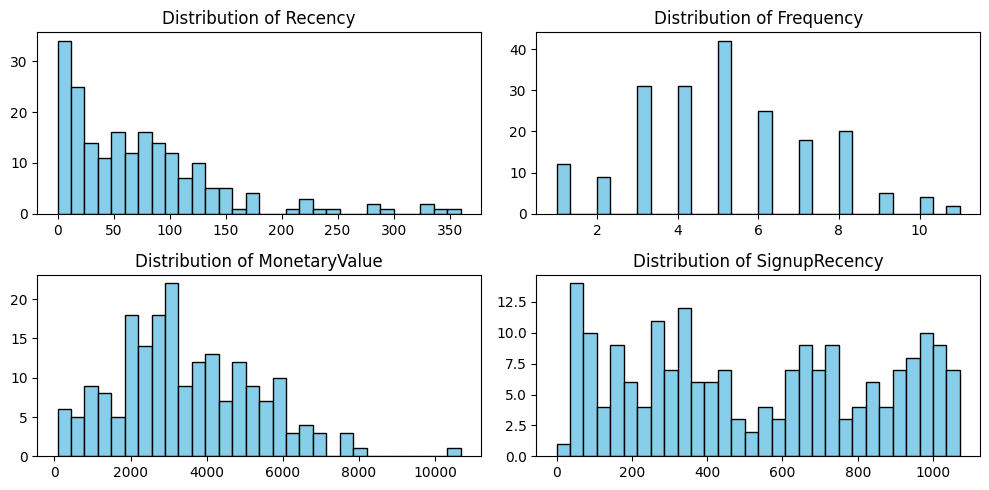

In [17]:
# List of numerical features
features = ["Recency", "Frequency", "MonetaryValue", "SignupRecency"]

# Plot histograms
plt.figure(figsize=(10, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.hist(customer_features[feature], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

###### outlier check

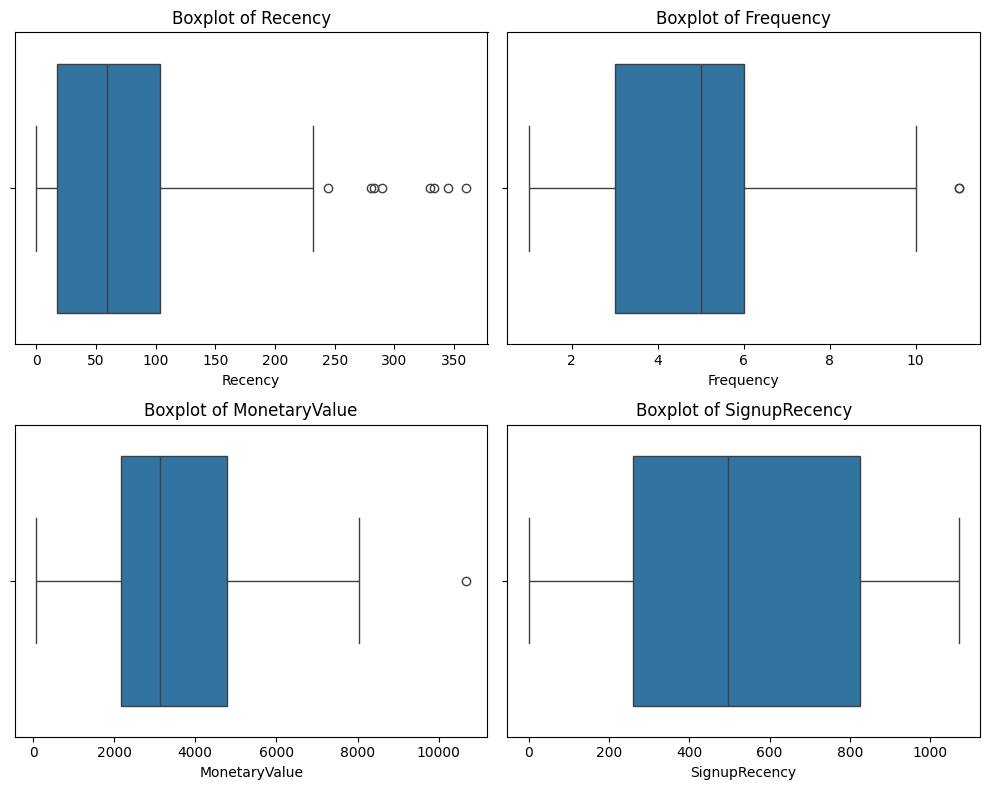

In [18]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=customer_features[feature],)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

###### mean check

In [19]:
customer_features.describe()

,Recency,Frequency,MonetaryValue,SignupRecency
count,199.000000,199.000000,199.000000,199.000000
mean,73.889447,5.025126,3467.314372,528.135678
std,70.943268,2.198340,1832.677958,326.273413
min,0.000000,1.000000,82.360000,0.000000
25%,17.000000,3.000000,2162.040000,259.000000
50%,59.000000,5.000000,3137.660000,497.000000
75%,104.000000,6.000000,4770.225000,825.000000
max,360.000000,11.000000,10673.870000,1071.000000


In [20]:
print("skewness :" , skew(customer_features['Recency']))
print("kurtosis :" , kurtosis(customer_features['Recency']))

skewness : 1.6828900978758363
kurtosis : 3.4004734019459315


In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(customer_features[['Recency', 'Frequency', 'MonetaryValue', 'SignupRecency']])

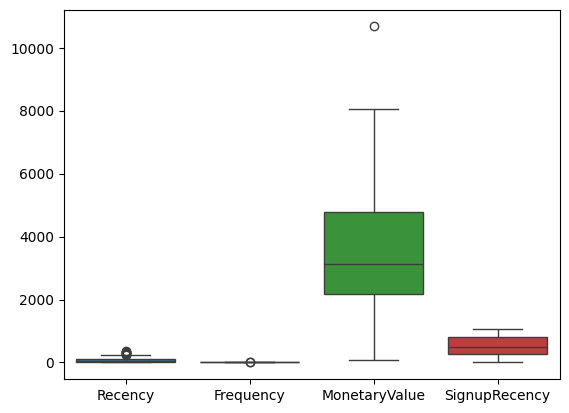

In [22]:
sns.boxplot(data = customer_features)
plt.show()

<Axes: xlabel='Frequency'>

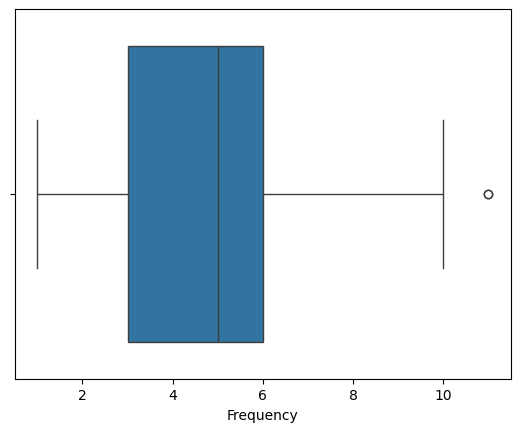

In [29]:
sns.boxplot(x=customer_features['Frequency'])

In [30]:
customer_features['MonetaryValue'] = np.log1p(customer_features['MonetaryValue'])  # log(1 + x)
customer_features['Recency'] = np.log1p(customer_features['Recency'])

<Axes: xlabel='MonetaryValue'>

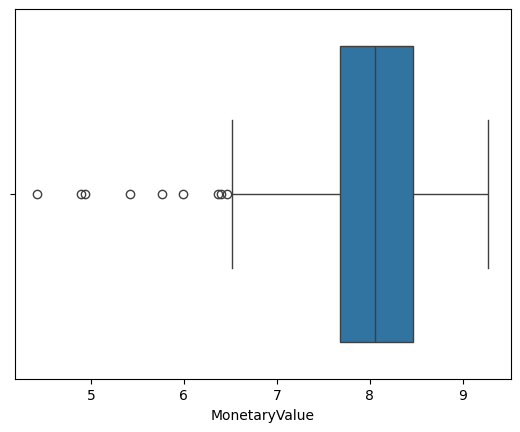

In [34]:
sns.boxplot(x=customer_features['MonetaryValue'])